In [1]:
import torch


In [2]:
t1 = torch.tensor([[1,3,5,6],[4,5,6,7]])
t1.dtype

torch.int64

In [3]:
x= torch.tensor(1.0, requires_grad=False)

In [4]:
w=torch.tensor(3.0,requires_grad=True)
b= torch.tensor(6.0, requires_grad=True)

In [5]:
import numpy as np

In [6]:
y = w*x+b
m= torch.tensor(2.0, requires_grad=True)
z= 1*y + m


In [7]:
y.backward(retain_graph=True)  #Now we can do backward propagation to compute gradients

In [8]:
print(x.grad)

None


In [9]:
print(w.grad)

tensor(1.)


In [10]:
print(b.grad)

tensor(1.)


In [11]:
z.backward()

In [12]:
print(m.grad)

tensor(1.)


In [13]:
x= np.array([1.0,2.0,3.0])

In [14]:
x

array([1., 2., 3.])

In [15]:
y = torch.tensor(x)

In [16]:
x.dtype

dtype('float64')

In [17]:
a = torch.tensor([1.,2.,3.,5,6], dtype=torch.float32)

In [18]:
b = torch.tensor([1.,2.,3.,5,6], dtype=torch.float32)

In [19]:
diff=a-b
diff

tensor([0., 0., 0., 0., 0.])

In [20]:
diff.numel()

5

## Lets create a neural network

In [21]:
"""
Suppose this is our dataset
"""
import pandas as pd
df = pd.DataFrame({"Age":[20,21,22,23,24,25], "Experience":[1,2,3,4,5,6],"Salary":[20000,21000,22000,23000,24000,25000]})
df

,Age,Experience,Salary
0,20,1,20000
1,21,2,21000
2,22,3,22000
3,23,4,23000
4,24,5,24000
5,25,6,25000


In [22]:
X= torch.tensor([[20,1],[21,2],[22,3],[23,4],[24,5],[25,6]], dtype=torch.float32)

In [23]:
X

tensor([[20.,  1.],
        [21.,  2.],
        [22.,  3.],
        [23.,  4.],
        [24.,  5.],
        [25.,  6.]])

In [24]:
y=torch.tensor([[20000,21000,22000,23000,24000,25000]], dtype=torch.float32).T

In [25]:
y

tensor([[20000.],
        [21000.],
        [22000.],
        [23000.],
        [24000.],
        [25000.]])

In [26]:
# formula --- y = WX + b
print(X.shape) # X is the [x1,x2,...xm]
print(y.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [27]:
"""
salary = w1*Age + W2*Experience + b
"""
b=torch.randn(1, requires_grad=True) 
W= torch.randn(1,2, requires_grad=True) #shape of W - (number of neurons in forward layer , number of neurons in backward layer)

In [28]:
print(W)
print(b)

tensor([[-0.5553, -0.1381]], requires_grad=True)
tensor([0.8382], requires_grad=True)


In [29]:
def model(X):
    y_pred = X @ W.T + b
    return y_pred

In [30]:
def mse(y_pred):
    loss2 = torch.sum((y_pred - y)**2)
    mse = loss2/len(y_pred)
    return mse

In [31]:
y_pred = model(X)

In [32]:
loss = mse(y_pred)
print(y_pred)
print(loss)

tensor([[-10.4063],
        [-11.0997],
        [-11.7932],
        [-12.4866],
        [-13.1801],
        [-13.8735]], grad_fn=<AddBackward0>)
tensor(5.0972e+08, grad_fn=<DivBackward0>)


In [33]:
y.shape
y_pred.shape

torch.Size([6, 1])

## Key Takeaways
- X is a matrix of vectors x,x2,x2....xm
- The shape of W is (no. of output columns, no. of inputs columns) 
- For 1 output, there is only 1 bias

In [34]:
#Lets update the weight of parameters W and b to minimize the cost by back prop
loss.backward()

In [35]:
"""
print(W)
print("dL/dW =", W.grad)
print(b)
print("dL/db =", b.grad)
"""


'\nprint(W)\nprint("dL/dW =", W.grad)\nprint(b)\nprint("dL/db =", b.grad)\n'

In [36]:
# After getting the gradient, we dont want pytorch to add the previous gradients to our new ones. So
with torch.no_grad():
    W -= 1e-5 * W.grad  # W=W-lr*dL/dW
    b -= 1e-5 * b.grad  # b=b-lr*dL/db
    W.grad.zero_()
    b.grad.zero_()

In [37]:
print(W)
print(b)

tensor([[9.6335, 1.4961]], requires_grad=True)
tensor([1.2885], requires_grad=True)


In [38]:
#Lets iterate it through epochs
for i in range(200):
    y_pred = model(X)
    loss = mse(y_pred)
    loss.backward()
    with torch.no_grad():
        W-= 1e-3 * W.grad
        b-= 1e-3 * b.grad
        W.grad.zero_()
        b.grad.zero_()
print(loss)

tensor(9803.8584, grad_fn=<DivBackward0>)


In [39]:
#!pip install jovian --upgrade -q

## Linear Regression with PyTorch built-ins

In [81]:
import torch.nn as nn
import torch.nn.functional as F

In [82]:
X= torch.tensor([[20,1],[21,2],[22,3],[23,4],[24,5],[25,6]], dtype=torch.float32)
y=torch.tensor([[20000,21000,22000,23000,24000,25000]], dtype=torch.float32).T

In [83]:
from torch.utils.data import DataLoader,TensorDataset


In [84]:
# TensorDatasets converts our datasets to their own standard implementation
td = TensorDataset(X,y)
td[:3] #selected the first 3 rows of X and y

(tensor([[20.,  1.],
         [21.,  2.],
         [22.,  3.]]),
 tensor([[20000.],
         [21000.],
         [22000.]]))

In [85]:
# DataLoader loads the datasets with specified batches for faster computation
dl = DataLoader(td, batch_size=4, shuffle=True)


In [86]:
list(dl) # created a batch of size 4

[[tensor([[20.,  1.],
          [25.,  6.],
          [22.,  3.],
          [21.,  2.]]),
  tensor([[20000.],
          [25000.],
          [22000.],
          [21000.]])],
 [tensor([[23.,  4.],
          [24.,  5.]]),
  tensor([[23000.],
          [24000.]])]]

In [87]:
for xl,yl in dl:
    print(xl)
    print(yl)

tensor([[24.,  5.],
        [25.,  6.],
        [20.,  1.],
        [21.,  2.]])
tensor([[24000.],
        [25000.],
        [20000.],
        [21000.]])
tensor([[23.,  4.],
        [22.,  3.]])
tensor([[23000.],
        [22000.]])


## torch.nn.Linear

- This Linear class of nn package can initialize the weights automatically

In [88]:
import torch.nn as nn
model = nn.Linear(in_features=2, out_features=1) # We have 2 input features and only 1 output target
model #This model is linear regression model

Linear(in_features=2, out_features=1, bias=True)

In [89]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3163,  0.4102]], requires_grad=True),
 Parameter containing:
 tensor([0.4858], requires_grad=True)]

In [90]:
model.weight

Parameter containing:
tensor([[-0.3163,  0.4102]], requires_grad=True)

In [91]:
model.bias

Parameter containing:
tensor([0.4858], requires_grad=True)

In [92]:
y_pred = model(X)
print(y_pred)

tensor([[-5.4303],
        [-5.3364],
        [-5.2426],
        [-5.1487],
        [-5.0549],
        [-4.9610]], grad_fn=<AddmmBackward>)


In [93]:
los = F.mse_loss

In [95]:
#  ?nn.Linear

In [96]:
print(y.shape)
print(y_pred.shape)

torch.Size([6, 1])
torch.Size([6, 1])


In [97]:
loss = los(y_pred,y)
loss

tensor(5.0940e+08, grad_fn=<MseLossBackward>)

In [98]:
# Now optimizing the parameters to reduce the loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### ANN Training

In [2]:
import torch, torchvision

from torchvision import datasets, transforms

In [3]:
torch.__version__

'1.8.1+cpu'

In [5]:
train = datasets.MNIST('', train=True, download=False, transform = transforms.Compose([transforms.ToTensor()]))

testt = datasets.MNIST('', train=False, download=False, transform = transforms.Compose([transforms.ToTensor()]))

In [6]:
from torch.utils.data import DataLoader

In [7]:
train_dataset = DataLoader(train, batch_size=10, shuffle=True)
test_dataset = DataLoader(testt, batch_size=10, shuffle=True)

In [8]:
len(train_dataset)

6000

In [9]:
len(test_dataset)

1000

In [10]:
for x in train_dataset:
    print(x)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([7, 6, 0, 4, 9, 0, 5, 8, 3, 1])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([1, 1, 5, 5, 6, 4, 9, 8, 9, 3])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([1, 0, 1, 4, 3, 3, 1, 2, 3, 3])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([1, 8, 3, 1, 9, 8, 2, 5, 8, 0])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  .

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([3, 2, 9, 7, 3, 6, 2, 4, 7, 5])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([7, 7, 4, 6, 7, 1, 8, 7, 2, 6])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([7, 4, 2, 1, 9, 9, 1, 3, 6, 7])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([1, 0, 2, 8, 7, 6, 7, 3, 4, 2])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([5, 3, 3, 7, 9, 8, 2, 4, 4, 0])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([8, 7, 8, 9, 8, 3, 3, 5, 7, 6])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([8, 0, 5, 5, 5, 8, 3, 5, 5, 4])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

          [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([8, 5, 9, 1, 0, 5, 5, 0, 8, 6])]
[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
 

KeyboardInterrupt: 

In [11]:
x

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [12]:
data = x

In [13]:
len(data)

2

In [14]:
data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [15]:
import matplotlib.pyplot as plt

tensor(9)


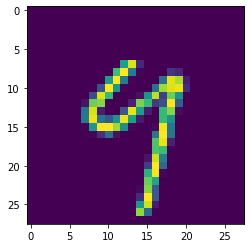

In [16]:
plt.imshow(data[0][0].view(28,28))
print(data[1][0])

In [17]:
from collections import Counter
import numpy as np
y_train = [labels.detach().numpy() for images, labels in train_dataset]
y_train = np.array(y_train).ravel()
Counter(y_train)

Counter({8: 5851,
         5: 5421,
         7: 6265,
         2: 5958,
         3: 6131,
         0: 5923,
         4: 5842,
         1: 6742,
         6: 5918,
         9: 5949})

In [18]:
y_train

array([8, 5, 7, ..., 7, 8, 6], dtype=int64)

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(self, NeuralNet).__init__()
        self.fc1 = nn.Linear(28*28, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x